In [1]:
import os
import collections
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [127]:
columns = open('./dataset/ebay/Train_Tagged_Titles.tsv').readlines()[0].strip().split('\t')
data = []
for line in open('./dataset/ebay/Train_Tagged_Titles.tsv').readlines()[1:]:
    data.append(line.strip().split('\t'))
train = pd.DataFrame(data, columns=columns)

In [128]:
train.head()

,Record Number,Title,Token,Tag
0,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,LOUIS,Brand
1,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,VUITTON,None
2,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,M40096,MPN
3,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,Handbag,Type
4,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,Priscilla,Model


<AxesSubplot:xlabel='Tag'>

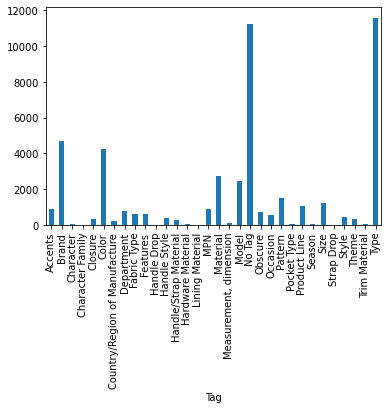

In [129]:
train.groupby('Tag').size().plot.bar()

In [130]:
train['fill'] = 0

In [131]:
train.loc[train['Tag'].isnull(), 'fill'] = 1

In [132]:
train = train.fillna('UNK')

In [133]:
train.head()

,Record Number,Title,Token,Tag,fill
0,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,LOUIS,Brand,0
1,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,VUITTON,UNK,1
2,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,M40096,MPN,0
3,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,Handbag,Type,0
4,1,LOUIS VUITTON M40096 Handbag Priscilla Multi-c...,Priscilla,Model,0


In [134]:
# idxes = train[train['fill']==1].index
# start = []
# for idx in idxes:
#     while train.loc[idx, 'fill'] != 0:
#         idx -= 1
#     start.append(idx)
# start = list(set(start))
# combs = []
# for s in start:
#     comb = []
#     while train.loc[s+1, 'fill'] == 1:
#         comb.append(train.loc[s, 'Token'])
#         s += 1
#     comb.append(train.loc[s, 'Token'])
#     combs.append((' '.join(comb), train.loc[s, 'Tag']))
# combs = list(set(combs))
# combs = pd.DataFrame(combs, columns=['token', 'tag'])
# combs['token'] = combs['token'].str.lower()
# combs = combs.drop_duplicates()
# combs['size'] = combs['token'].map(combs.groupby('token').size().to_dict())
# combs = combs[combs['size']==1].drop(columns=['size']).reset_index(drop=True)
# combs['size'] = combs['token'].str.split().str.len()

In [135]:
# combs.to_csv('./dataset/ebay/combs_in_train.csv', index=False)

In [137]:
print(f"- # of unique titles: {train['Title'].nunique()}")
print(f"- # of tokens: {len(train)}")
print(f"- # of unique tokens: {train['Token'].nunique()}")
print(f"- # of unique tags: {train['Tag'].nunique()}")
print(f"- max tokens: {train.groupby('Record Number').size().max()}, min tokens: {train.groupby('Record Number').size().min()}, avg tokens: {train.groupby('Record Number').size().mean()}")
print(f"- {train['Tag'].nunique()} tags: {train['Tag'].unique().tolist()}")

- # of unique titles: 5000
- # of tokens: 55121
- # of unique tokens: 8952
- # of unique tags: 33
- max tokens: 22, min tokens: 1, avg tokens: 11.0242
- 33 tags: ['Brand', 'UNK', 'MPN', 'Type', 'Model', 'Color', 'Fabric Type', 'Closure', 'Pattern', 'Material', 'No Tag', 'Product Line', 'Features', 'Theme', 'Country/Region of Manufacture', 'Occasion', 'Department', 'Size', 'Handle/Strap Material', 'Handle Style', 'Accents', 'Style', 'Hardware Material', 'Trim Material', 'Measurement, dimension', 'Pocket Type', 'Character', 'Obscure', 'Season', 'Character Family', 'Lining Material', 'Strap Drop', 'Handle Drop']


In [138]:
train_gr = train.groupby('Record Number').agg(lambda x: list(x))

In [139]:
df_train, df_val = train_test_split(train_gr, test_size=0.2)
df_val, df_test = train_test_split(df_val, test_size=0.5)
train_gr['mode'] = 0
train_gr.loc[df_val.index, 'mode'] = 1
train_gr.loc[df_test.index, 'mode'] = 2

In [140]:
tags = [y for x in df_train['Tag'].values for y in x]
assert len(set(tags)) == 32+1
cnt = collections.Counter(tags)

In [141]:
train_gr.head()

,Title,Token,Tag,fill,mode
Record Number,,,,,
1,[LOUIS VUITTON M40096 Handbag Priscilla Multi-...,"[LOUIS, VUITTON, M40096, Handbag, Priscilla, M...","[Brand, UNK, MPN, Type, Model, Color, Fabric T...","[0, 1, 0, 0, 0, 0, 0, 0, 0]",1
10,"[Gucci White "" HoBo "" Vintage Handbag Authenti...","[Gucci, White, "", HoBo, "", Vintage, Handbag, A...","[Brand, Color, No Tag, Type, No Tag, No Tag, T...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
100,[Gucci Black GG Monogram Half Moon Small Pouch...,"[Gucci, Black, GG, Monogram, Half, Moon, Small...","[Brand, Color, Brand, Pattern, Features, UNK, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0
1000,[CHANEL Quilted Matelasse CC Logo Lambskin Cha...,"[CHANEL, Quilted, Matelasse, CC, Logo, Lambski...","[Brand, Features, Pattern, Accents, UNK, Mater...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0
1001,[New Kate Spade Staci Medium Satchel Leather W...,"[New, Kate, Spade, Staci, Medium, Satchel, Lea...","[No Tag, Brand, UNK, Model, Size, Type, Materi...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0


In [142]:
train_gr.to_csv('./dataset/ebay/train_gr.csv', index=False)

In [143]:
tag2idx = {x:i for i, x in enumerate(sorted([x for x in train['Tag'].unique() if x != 'UNK']))}
np.save('./dataset/ebay/tag2idx.npy', tag2idx)

In [89]:
columns = open('./dataset/ebay/Listing_Titles.tsv').readlines()[0].strip().split('\t')
data = []
for line in open('./dataset/ebay/Listing_Titles.tsv').readlines()[1:30005]:
    data.append(line.strip().split('\t'))
quiz = pd.DataFrame(data, columns=columns)

In [93]:
quiz['Record Number'] = quiz['Record Number'].astype(int)

In [94]:
quiz = quiz[(quiz['Record Number']>=5001)&(quiz['Record Number']<=30000)]

In [95]:
quiz

,Record Number,Title
5000,5001,SALE ! Kamen Rider Gaim Belt Set No. 802
5001,5002,HOBO INTERNATIONAL Women 's VINTAGE LEATHER Sh...
5002,5003,Coach Peyton Brown and Tan Signature C Shoulde...
5003,5004,MZ WALLACE Metro tote gray quilted nylon purse
5004,5005,Women Fashion Sequins Backpack Travel PU Handb...
...,...,...
29995,29996,Auth LOUIS VUITTON Popincourt Haut Shoulder Ba...
29996,29997,Blackheath Book Shop Bag
29997,29998,Brighton Piatto Medium Organizer Embroidered L...
29998,29999,"Jaald 13 "" Leather Satchel Genuine Leather Mes..."


In [96]:
quiz.to_csv('./dataset/ebay/quiz.csv', index=False)

Extract unlabeled images

In [10]:
columns = open('./dataset/ebay/Listing_Titles.tsv').readlines()[0].strip().split('\t')
data = []
for line in open('./dataset/ebay/Listing_Titles.tsv').readlines()[30005:50000]:
    data.append(line.strip().split('\t'))
quiz = pd.DataFrame(data, columns=columns)

In [11]:
quiz['Record Number'] = quiz['Record Number'].astype(int)

In [12]:
quiz = quiz[quiz['Record Number']>30000]

In [14]:
quiz.to_csv('./dataset/ebay/addon.csv', index=False)